In [62]:
import pandas as pd
import shapely.geometry
import shapely.wkt
import geopandas as gpd
from osgeo import gdal
from osgeo import ogr
import json
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
import math
from osgeo import ogr, gdal
import subprocess
import pandas as pd
import os.path
import shutil
import os.path
import rasterio
import numpy as np
from statistics import mean

In [63]:
#folder paths 
path_phase1="D:/def downloads/downloads/phase 1"   #phase 1_fold
path_phase2="D:/def downloads/downloads/phase 2"  #phase 2_fold
path_phase3="D:/def downloads/downloads/phase 3"  #phase 3_fold
path_phase4="D:/def downloads/downloads/phase 4"   #phase 4_fold

pune_shp_path="D:/def downloads/downloads/New folder (15)/pune_Output.shp" #pune_shp
workin_dir_path1="D:/def downloads/downloads/New folder (16)"
workin_dir_path2="D:/def downloads/downloads/New folder (17)"
workin_dir_path3="D:/def downloads/downloads/New folder (18)"
workin_dir_path4="D:/def downloads/downloads/New folder (19)"

In [64]:
#pune_shp info
pune = gpd.read_file(pune_shp_path)
pune_proj=pune.crs

In [65]:
#open folder for phase1
list_phase1 = []
for x in os.listdir(path_phase1):
    if x.endswith(".tif"):
        x=path_phase1+'/'+x
        list_phase1.append(x)

In [66]:
list_phase1

['D:/def downloads/downloads/phase 1/MOD04_L2.A2020085.mosaic.061.2022252082738.pssgrpgs_000501834723.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 1/MOD04_L2.A2020086.mosaic.061.2022252082805.pssgrpgs_000501834723.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 1/MOD04_L2.A2020087.mosaic.061.2022252082808.pssgrpgs_000501834723.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 1/MOD04_L2.A2020088.mosaic.061.2022252082732.pssgrpgs_000501834723.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 1/MOD04_L2.A2020090.mosaic.061.2022252082706.pssgrpgs_000501834723.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 1/MOD04_L2.A202

In [68]:
i=0
ph1=[]
for x in range(len(list_phase1)) :
    z=workin_dir_path1+"ph1"+str(i)+"Reprj.tif"
    print(z)
    y1=gdal.Open(list_phase1[i])
    # reproject
    demReprj = gdal.Warp(z, y1 , dstSRS = pune_proj)
    with rasterio.open(z) as src:
        meta = src.meta

        # My target coordinates
        x_coord =73.856

        y_coord =18.52

        # Use the transform in the metadata and your coordinates
        rowcol = rasterio.transform.rowcol(meta['transform'], xs=x_coord, ys=y_coord)
        print(rowcol)
        ds = gdal.Open(z)
        y=(y1.GetRasterBand(1).GetNoDataValue())
        print(y)
        arr=np.array(ds.GetRasterBand(1).ReadAsArray())
        arrk= np.where(arr == y, 0,arr)
        arr_1 = np.where(arr<0, 0, arr)
        b=arr_1[rowcol[0]][rowcol[1]]
        print(ph1)
        ph1.append(b)
        i+=1
ph1.remove(0)
print(ph1)
print(mean(ph1))
avg1 =mean(ph1)
print(max(ph1))

D:/def downloads/downloads/New folder (16)ph10Reprj.tif
(16, 22)
None
[]
D:/def downloads/downloads/New folder (16)ph11Reprj.tif
(16, 22)
None
[0]
D:/def downloads/downloads/New folder (16)ph12Reprj.tif
(16, 22)
None
[0, 495]
D:/def downloads/downloads/New folder (16)ph13Reprj.tif
(16, 22)
None
[0, 495, 828]
D:/def downloads/downloads/New folder (16)ph14Reprj.tif
(16, 22)
None
[0, 495, 828, 727]
D:/def downloads/downloads/New folder (16)ph15Reprj.tif
(16, 22)
None
[0, 495, 828, 727, 460]
D:/def downloads/downloads/New folder (16)ph16Reprj.tif
(16, 22)
None
[0, 495, 828, 727, 460, 456]
D:/def downloads/downloads/New folder (16)ph17Reprj.tif
(16, 22)
None
[0, 495, 828, 727, 460, 456, 548]
D:/def downloads/downloads/New folder (16)ph18Reprj.tif
(16, 22)
None
[0, 495, 828, 727, 460, 456, 548, 448]
D:/def downloads/downloads/New folder (16)ph19Reprj.tif
(16, 22)
None
[0, 495, 828, 727, 460, 456, 548, 448, 491]
D:/def downloads/downloads/New folder (16)ph110Reprj.tif
(16, 22)
None
[0, 495, 8

In [34]:
#open folder for phase2
list_phase2 = []
for x in os.listdir(path_phase2):
    if x.endswith(".tif"):
        x=path_phase2+'/'+x
        list_phase2.append(x)

In [35]:
list_phase2

['D:/def downloads/downloads/phase 2/MOD04_L2.A2020108.mosaic.061.2022252091046.pssgrpgs_000501834737.Deep_Blue_Spectral_Aerosol_Optical_Depth_Land_1-Deep_Blue_Spectral_Aerosol_Optical_Depth_Land.tif',
 'D:/def downloads/downloads/phase 2/MOD04_L2.A2020108.mosaic.061.2022252091046.pssgrpgs_000501834737.Deep_Blue_Spectral_Aerosol_Optical_Depth_Land_2-Deep_Blue_Spectral_Aerosol_Optical_Depth_Land.tif',
 'D:/def downloads/downloads/phase 2/MOD04_L2.A2020108.mosaic.061.2022252091046.pssgrpgs_000501834737.Deep_Blue_Spectral_Aerosol_Optical_Depth_Land_3-Deep_Blue_Spectral_Aerosol_Optical_Depth_Land.tif',
 'D:/def downloads/downloads/phase 2/MOD04_L2.A2020109.mosaic.061.2022252091049.pssgrpgs_000501834737.Deep_Blue_Spectral_Aerosol_Optical_Depth_Land_1-Deep_Blue_Spectral_Aerosol_Optical_Depth_Land.tif',
 'D:/def downloads/downloads/phase 2/MOD04_L2.A2020109.mosaic.061.2022252091049.pssgrpgs_000501834737.Deep_Blue_Spectral_Aerosol_Optical_Depth_Land_2-Deep_Blue_Spectral_Aerosol_Optical_Depth_L

In [69]:
i=0
ph2=[]
for x in range(len(list_phase2)) :
    z=workin_dir_path2+"ph2"+str(i)+"Reprj.tif"
    print(z)
    y1=gdal.Open(list_phase2[i])
    print("done")
    # reproject
    demReprj = gdal.Warp(z, y1 , dstSRS = pune_proj)
    with rasterio.open(z) as src:
        meta = src.meta

        # My target coordinates
        x_coord =73.856

        y_coord =18.52

        # Use the transform in the metadata and your coordinates
        rowcol = rasterio.transform.rowcol(meta['transform'], xs=x_coord, ys=y_coord)
        print(rowcol)
        ds = gdal.Open(z)
        y=(y1.GetRasterBand(1).GetNoDataValue())
        print(y)
        arr=np.array(ds.GetRasterBand(1).ReadAsArray())
        arrk= np.where(arr == y, 0,arr)
        arr_1 = np.where(arr<0, 0, arr)
        b=arr_1[rowcol[0]][rowcol[1]]
        print(ph2)
        ph2.append(b)
        i+=1
ph2.remove(0)
print(ph2)
print(mean(ph2))
avg2 =mean(ph2)
print(max(ph2))

D:/def downloads/downloads/New folder (17)ph20Reprj.tif
done
(16, 22)
None
[]
D:/def downloads/downloads/New folder (17)ph21Reprj.tif
done
(16, 22)
None
[508]
D:/def downloads/downloads/New folder (17)ph22Reprj.tif
done
(16, 22)
None
[508, 508]
D:/def downloads/downloads/New folder (17)ph23Reprj.tif
done
(16, 22)
None
[508, 508, 508]
D:/def downloads/downloads/New folder (17)ph24Reprj.tif
done
(16, 22)
None
[508, 508, 508, 659]
D:/def downloads/downloads/New folder (17)ph25Reprj.tif
done
(16, 22)
None
[508, 508, 508, 659, 633]
D:/def downloads/downloads/New folder (17)ph26Reprj.tif
done
(16, 22)
None
[508, 508, 508, 659, 633, 575]
D:/def downloads/downloads/New folder (17)ph27Reprj.tif
done
(16, 22)
None
[508, 508, 508, 659, 633, 575, 439]
D:/def downloads/downloads/New folder (17)ph28Reprj.tif
done
(16, 22)
None
[508, 508, 508, 659, 633, 575, 439, 439]
D:/def downloads/downloads/New folder (17)ph29Reprj.tif
done
(16, 22)
None
[508, 508, 508, 659, 633, 575, 439, 439, 439]
D:/def downlo

In [42]:
#open folder for phase3
list_phase3 = []
for x in os.listdir(path_phase3):
    if x.endswith(".tif"):
        x=path_phase3+'/'+x
        list_phase3.append(x)

In [43]:
list_phase3

['D:/def downloads/downloads/phase 3/MOD04_L2.A2020125.mosaic.061.2022252091055.pssgrpgs_000501834747.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 3/MOD04_L2.A2020126.mosaic.061.2022252091059.pssgrpgs_000501834747.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 3/MOD04_L2.A2020127.mosaic.061.2022252091100.pssgrpgs_000501834747.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 3/MOD04_L2.A2020129.mosaic.061.2022252091049.pssgrpgs_000501834747.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 3/MOD04_L2.A2020131.mosaic.061.2022252091053.pssgrpgs_000501834747.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 3/MOD04_L2.A202

In [70]:
i=0
ph3=[]
for x in range(len(list_phase3)) :
    z=workin_dir_path3+"ph3"+str(i)+"Reprj.tif"
    print(z)
    y1=gdal.Open(list_phase3[i])
    print("done")
    # reproject
    demReprj = gdal.Warp(z, y1 , dstSRS = pune_proj)
    with rasterio.open(z) as src:
        meta = src.meta

        # My target coordinates
        x_coord =73.856

        y_coord =18.52

        # Use the transform in the metadata and your coordinates
        rowcol = rasterio.transform.rowcol(meta['transform'], xs=x_coord, ys=y_coord)
        print(rowcol)
        ds = gdal.Open(z)
        y=(y1.GetRasterBand(1).GetNoDataValue())
        print(y)
        arr=np.array(ds.GetRasterBand(1).ReadAsArray())
        arrk= np.where(arr == y, 0,arr)
        arr_1 = np.where(arr<0, 0, arr)
        b=arr_1[rowcol[0]][rowcol[1]]
        print(ph3)
        ph3.append(b)
        i+=1
# ph3.remove(0)
print(ph3)
print(mean(ph3))
avg3 =mean(ph3)
print(max(ph3))

D:/def downloads/downloads/New folder (18)ph30Reprj.tif
done
(16, 22)
None
[]
D:/def downloads/downloads/New folder (18)ph31Reprj.tif
done
(16, 22)
None
[225]
D:/def downloads/downloads/New folder (18)ph32Reprj.tif
done
(16, 22)
None
[225, 257]
D:/def downloads/downloads/New folder (18)ph33Reprj.tif
done
(16, 22)
None
[225, 257, 536]
D:/def downloads/downloads/New folder (18)ph34Reprj.tif
done
(16, 22)
None
[225, 257, 536, 474]
D:/def downloads/downloads/New folder (18)ph35Reprj.tif
done
(16, 22)
None
[225, 257, 536, 474, 535]
D:/def downloads/downloads/New folder (18)ph36Reprj.tif
done
(16, 22)
None
[225, 257, 536, 474, 535, 406]
[225, 257, 536, 474, 535, 406, 408]
405
536


In [47]:
#open folder for phase4
list_phase4 = []
for x in os.listdir(path_phase4):
    if x.endswith(".tif"):
        x=path_phase4+'/'+x
        list_phase4.append(x)

In [48]:
list_phase4

['D:/def downloads/downloads/phase 4/MOD04_L2.A2020141.mosaic.061.2022252091402.pssgrpgs_000501834763.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 4/MOD04_L2.A2020145.mosaic.061.2022252091409.pssgrpgs_000501834763.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 4/MOD04_L2.A2020147.mosaic.061.2022252091404.pssgrpgs_000501834763.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 4/MOD04_L2.A2020149.mosaic.061.2022252091404.pssgrpgs_000501834763.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif',
 'D:/def downloads/downloads/phase 4/MOD04_L2.A2020150.mosaic.061.2022252091432.pssgrpgs_000501834763.Deep_Blue_Aerosol_Optical_Depth_550_Land-Deep_Blue_Aerosol_Optical_Depth_550_Land.tif']

In [71]:
i=0
ph4=[]
for x in range(len(list_phase4)) :
    z=workin_dir_path3+"ph4"+str(i)+"Reprj.tif"
    print(z)
    y1=gdal.Open(list_phase4[i])
    print("done")
    # reproject
    demReprj = gdal.Warp(z, y1 , dstSRS = pune_proj)
    with rasterio.open(z) as src:
        meta = src.meta

        # My target coordinates
        x_coord =73.856

        y_coord =18.52

        # Use the transform in the metadata and your coordinates
        rowcol = rasterio.transform.rowcol(meta['transform'], xs=x_coord, ys=y_coord)
        print(rowcol)
        ds = gdal.Open(z)
        y=(y1.GetRasterBand(1).GetNoDataValue())
        print(y)
        arr=np.array(ds.GetRasterBand(1).ReadAsArray())
        arrk= np.where(arr == y, 0,arr)
        arr_1 = np.where(arr<0, 0, arr)
        b=arr_1[rowcol[0]][rowcol[1]]
        print(ph4)
        ph4.append(b)
        i+=1
# ph3.remove(0)
print(ph4)
print(mean(ph4))
avg4 =mean(ph4)
print(max(ph4))

D:/def downloads/downloads/New folder (18)ph40Reprj.tif
done
(16, 22)
None
[]
D:/def downloads/downloads/New folder (18)ph41Reprj.tif
done
(16, 22)
None
[398]
D:/def downloads/downloads/New folder (18)ph42Reprj.tif
done
(16, 22)
None
[398, 539]
D:/def downloads/downloads/New folder (18)ph43Reprj.tif
done
(16, 22)
None
[398, 539, 565]
D:/def downloads/downloads/New folder (18)ph44Reprj.tif
done
(16, 22)
None
[398, 539, 565, 311]
[398, 539, 565, 311, 374]
437
565


In [52]:
pune=[523,406,405,437]
satara=[450,305,301,213]
value2=["Phase1","Phase2","Phase3","Phase4"]

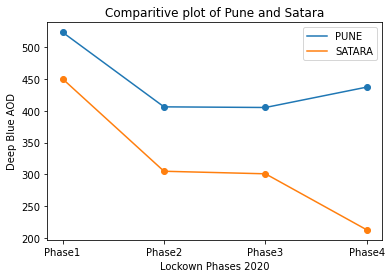

In [56]:
plt.scatter(value2,pune)
plt.scatter(value2,satara)
plt.plot(value2, pune,label='PUNE')
plt.plot(value2,satara,label='SATARA')
plt.legend()
plt.savefig('plot.png')
plt.title("Comparitive plot of Pune and Satara")
plt.xlabel("Lockown Phases 2020")
plt.ylabel("Deep Blue AOD")
plt.show()